In [1]:
# pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

## Original data

### EDA

In [2]:
sns.set_theme(style="white")
sns.set_palette("deep")

In [3]:
df_loan = pd.read_excel("..\\..\\data\\Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)
# df_loan.head()

In [4]:
df_loan = df_loan.drop("ID", axis=1)
df_loan.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [6]:
df_loan.describe()

Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93152.503000     2.396400   
std      11.463166    11.467954    46.033729   2121.852197     1.147663   
min      23.000000    -3.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      1.937913     1.881000    56.498800       0.096000   
std       1.747666     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       0.700000     1.000000     0.000000       0.000000   
50%       1.500000     2.000000     0.000000       0.000000   
75%       2.500000     3.000000   101.000000       0.000000   
max      10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [7]:
df_loan.duplicated().sum()

0

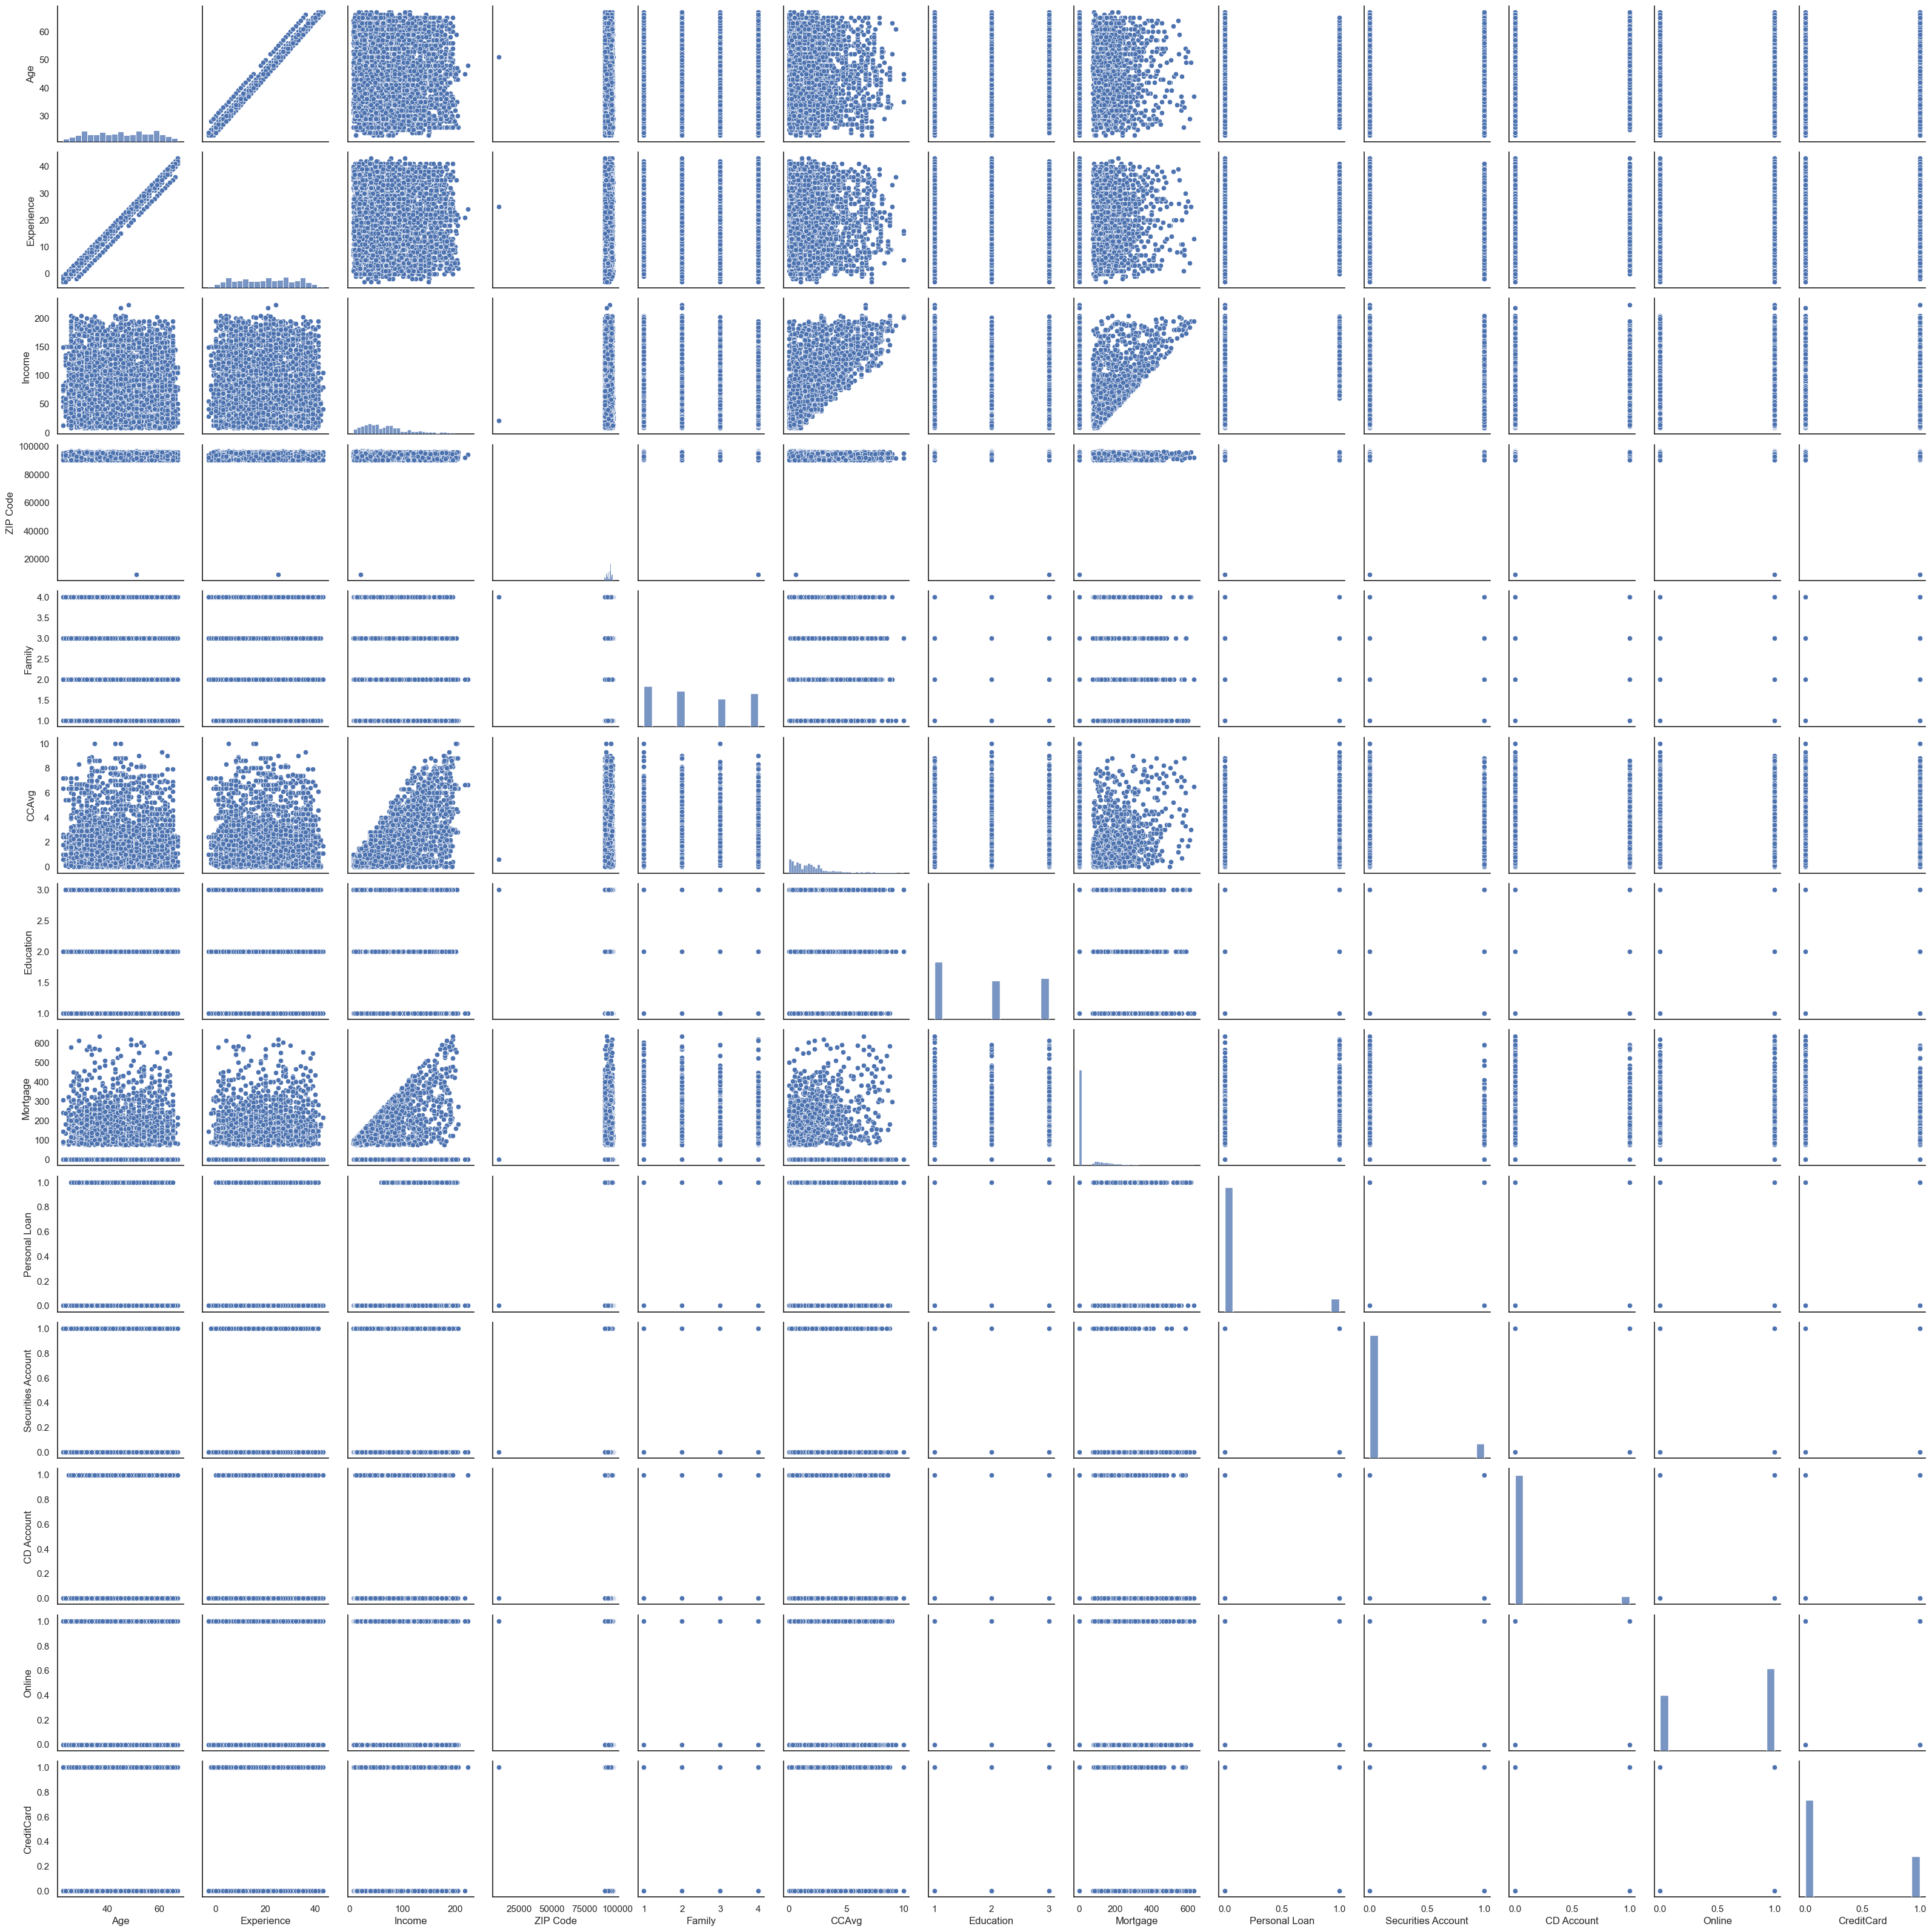

In [8]:
sns.pairplot(data=df_loan)

In [9]:
df_loan.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
for el in df_loan.columns:
    print(f"{el}: {df_loan[el].unique().shape[0]}")

Age: 45
Experience: 47
Income: 162
ZIP Code: 467
Family: 4
CCAvg: 108
Education: 3
Mortgage: 347
Personal Loan: 2
Securities Account: 2
CD Account: 2
Online: 2
CreditCard: 2


In [11]:
cat_col = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
non_cat_col = ['Age', 'Experience', 'CCAvg', 'Mortgage', 'Income','ZIP Code']

In [12]:
col_num = 3
rows_number = int(len(non_cat_col)/col_num)+1

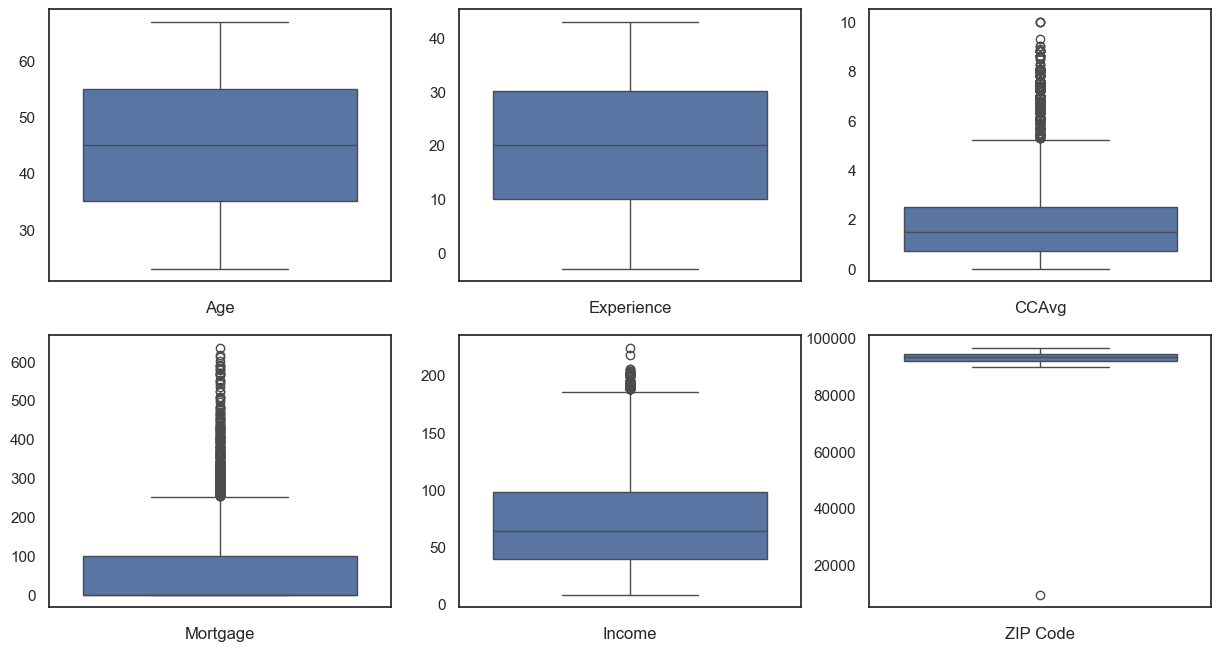

In [13]:
fig, ax = plt.subplots(rows_number, col_num, figsize=(col_num*5, rows_number*4))
for i in range(len(non_cat_col), rows_number*col_num):
    fig.delaxes(ax[rows_number-1, i%col_num])
for i in range(len(non_cat_col)):
    sns.boxplot(df_loan[non_cat_col[i]], ax=ax[int(i/col_num),i%col_num])
    ax[int(i/col_num),i%col_num].set_xlabel(non_cat_col[i])
    ax[int(i/col_num),i%col_num].set_ylabel("")
plt.show()

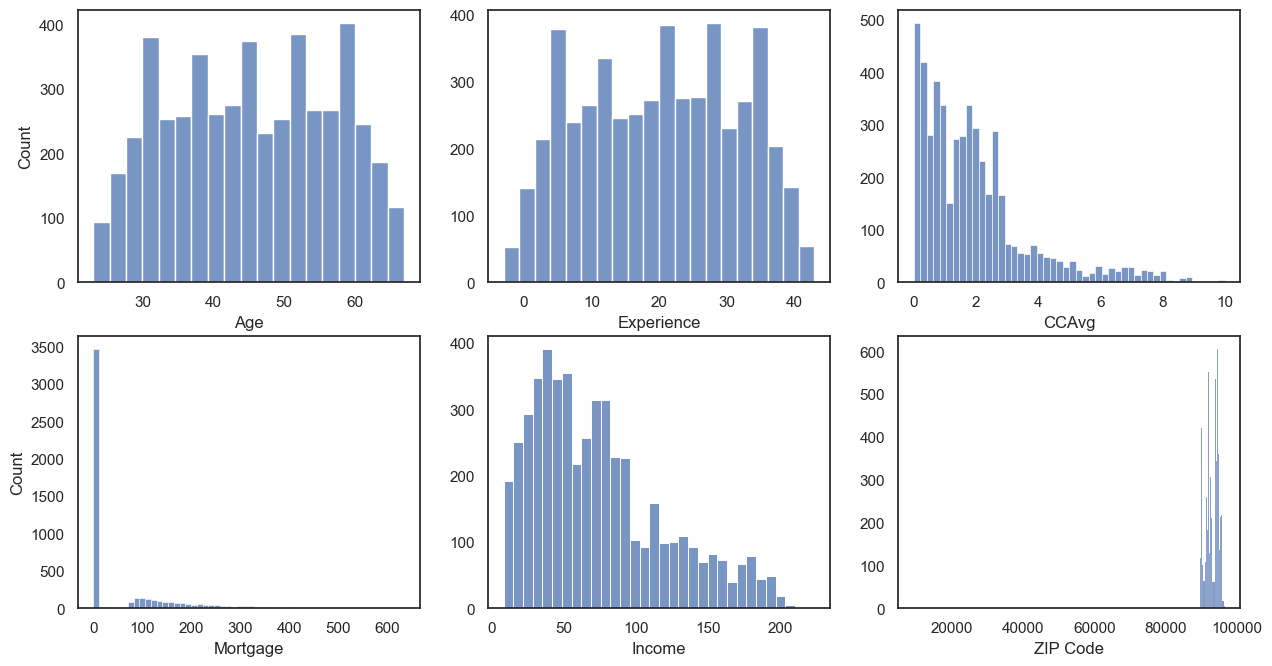

In [14]:
fig, ax = plt.subplots(rows_number, col_num, figsize=(col_num*5, rows_number*4))
for i in range(len(non_cat_col), rows_number*col_num):
    fig.delaxes(ax[rows_number-1, i%col_num])
for i in range(len(non_cat_col)):
    sns.histplot(df_loan[non_cat_col[i]], ax=ax[int(i/col_num),i%col_num])
    if i % col_num != 0:  # If not the first column in the row, remove y-axis labels
        ax[int(i/col_num),i%col_num].set_ylabel("")
plt.show()

In [15]:
mode_value = df_loan["Mortgage"].mode().iloc[0]
mode_value

0

<Axes: xlabel='Mortgage', ylabel='Count'>

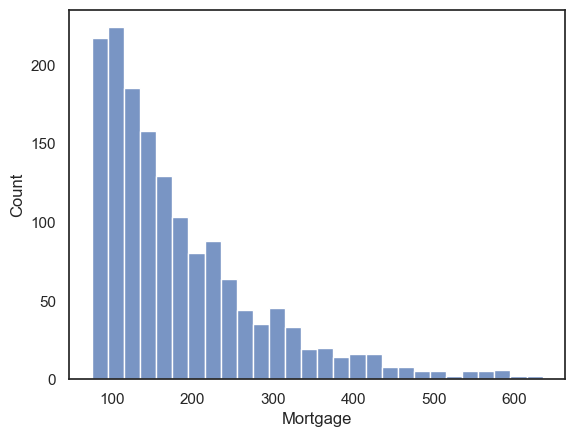

In [16]:
sns.histplot(df_loan["Mortgage"].where(df_loan["Mortgage"]!=mode_value))

In [17]:
df_loan.loc[(df_loan["ZIP Code"] < 80000)]

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    0.6          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

<Axes: >

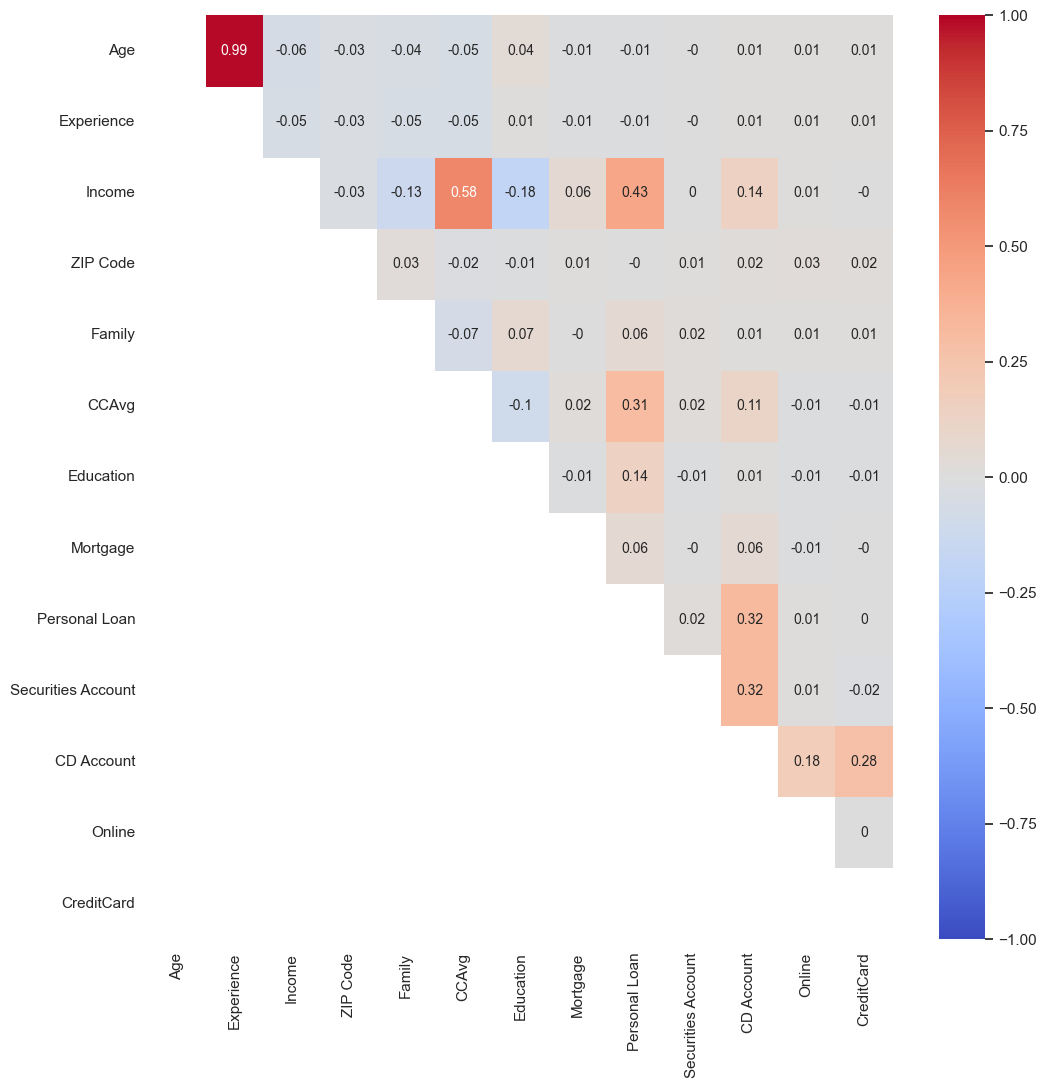

In [18]:
plt.figure(figsize = (12,12))
sns.heatmap(round(df_loan.corr(method = 'spearman'),2), mask = np.tril(df_loan.corr(method = 'spearman')), vmax=1, vmin=-1, 
            center=0,cmap='coolwarm', annot=True, annot_kws={"size": 10})

<Axes: xlabel='Age', ylabel='Percent'>

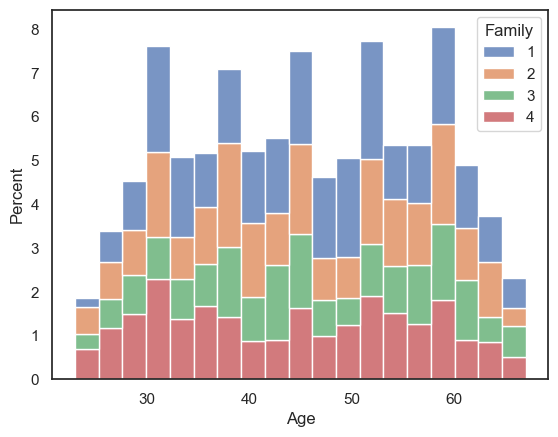

In [19]:
sns.histplot(data=df_loan, x="Age", hue="Family", multiple="stack", stat="percent", palette="deep")

### DT feature importances

In [20]:
model = tree.DecisionTreeClassifier(random_state=42)
indep_col = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']
dep_col = 'Personal Loan'

x_train = df_loan.loc[:, indep_col]
y_train = df_loan[[dep_col]]
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
# feature importance
dict(zip(indep_col, model.feature_importances_))

{'Age': 0.015327298564839682,
 'Experience': 0.018154204755421573,
 'Income': 0.3074505538212019,
 'ZIP Code': 0.01341909139589703,
 'Family': 0.15316939118734943,
 'CCAvg': 0.06017820214243984,
 'Education': 0.39201016873589745,
 'Mortgage': 0.009920326147080336,
 'Securities Account': 0.0,
 'CD Account': 0.018508038352841646,
 'Online': 0.007942208497255689,
 'CreditCard': 0.003920516399775249}

### Constraints & Conditions

In [22]:
# class balance
for el in cat_col:
    print(df_loan[[el]].value_counts()/len(df_loan))

Family
1         0.2944
2         0.2592
4         0.2444
3         0.2020
Name: count, dtype: float64
Education
1            0.4192
3            0.3002
2            0.2806
Name: count, dtype: float64
Personal Loan
0                0.904
1                0.096
Name: count, dtype: float64
Securities Account
0                     0.8956
1                     0.1044
Name: count, dtype: float64
CD Account
0             0.9396
1             0.0604
Name: count, dtype: float64
Online
1         0.5968
0         0.4032
Name: count, dtype: float64
CreditCard
0             0.706
1             0.294
Name: count, dtype: float64


<Axes: xlabel='Family', ylabel='count'>

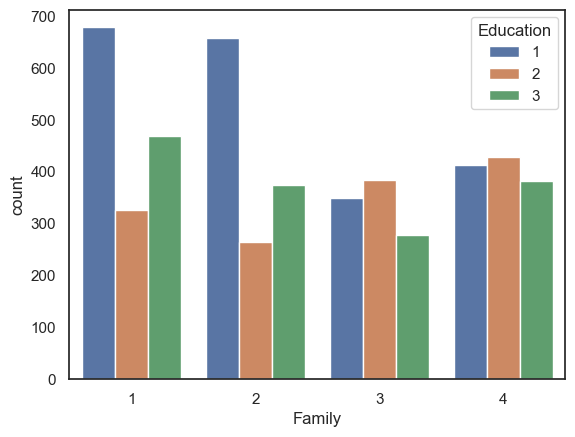

In [23]:
# condition
sns.countplot(data=df_loan, x="Family", hue="Education", palette="deep")

In [24]:
indicator = (df_loan["Family"] == 1) & (df_loan["Education"] == 3)
count = indicator.sum()
count/len(df_loan)

0.0936

### Model parameters

In [25]:
categorical_cols = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
general_cols = ['Age', 'Experience']
continuous_cols = ['CCAvg', 'Income', 'ZIP Code']
mixed_cols = ['Mortgage']
components_numbers = {"Mortgage": 6, 'CCAvg': 12, 'Income':6, 'ZIP Code': 8}
mixed_modes = {"Mortgage": [0]}
log_transf = ['CCAvg', 'Mortgage', 'Income']

class_balance = {"CreditCard": [0.3,0.7]} # constraint
condition_list = [{"col1":"Family", "cat1": 1, "col2": "Education", "cat2":3}]
cond_ratio = 0.2

target_col = "Personal Loan"
data_name = "loan"
task = "class"

## Generated data

### EDA

In [26]:
df_loan_fake = pd.read_csv("..\\..\\results\\loan\\synth_data\\constr_loss.csv",sep=',')
df_loan_fake.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   51          32      53     91977       4    3.1          3         0   
1   24           0      91     93677       4    1.3          3       159   
2   42          16      87     92249       1    3.4          3         0   
3   64          40     126     90364       2    3.1          1       255   
4   53          27      92     95061       1    0.0          1       274   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   0           0       0           0  
1              0                   0           0       1           0  
2              0                   0           0       1           0  
3              0                   0           0       1           0  
4              0                   0           0       1           0

In [27]:
df_loan_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1100 non-null   int64  
 1   Experience          1100 non-null   int64  
 2   Income              1100 non-null   int64  
 3   ZIP Code            1100 non-null   int64  
 4   Family              1100 non-null   int64  
 5   CCAvg               1100 non-null   float64
 6   Education           1100 non-null   int64  
 7   Mortgage            1100 non-null   int64  
 8   Personal Loan       1100 non-null   int64  
 9   Securities Account  1100 non-null   int64  
 10  CD Account          1100 non-null   int64  
 11  Online              1100 non-null   int64  
 12  CreditCard          1100 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 111.8 KB


In [28]:
df_loan_fake.describe()

Age   Experience       Income      ZIP Code       Family  \
count  1100.000000  1100.000000  1100.000000   1100.000000  1100.000000   
mean     45.180000    20.070000    88.155455  93172.511818     2.295455   
std      11.706852    11.735856    53.142746   1753.136192     1.143473   
min      24.000000    -3.000000    11.000000  90043.000000     1.000000   
25%      35.000000    10.000000    45.000000  91815.000000     1.000000   
50%      46.000000    20.000000    86.000000  93189.500000     2.000000   
75%      55.000000    30.000000   112.000000  94773.500000     3.000000   
max      66.000000    42.000000   222.000000  96270.000000     4.000000   

             CCAvg    Education     Mortgage  Personal Loan  \
count  1100.000000  1100.000000  1100.000000    1100.000000   
mean      2.422455     1.871818    76.477273       0.089091   
std       1.948503     0.844037   125.262630       0.285004   
min       0.000000     1.000000     0.000000       0.000000   
25%       1.200000     1.000000     0.000000       0.000000   
50%       2.100000     2.000000     0.000000       0.000000   
75%       3.000000     3.000000   155.250000       0.000000   
max      10.000000     3.000000   620.000000       1.000000   

       Securities Account   CD Account       Online   CreditCard  
count         1100.000000  1100.000000  1100.000000  1100.000000  
mean             0.116364     0.046364     0.586364     0.320000  
std              0.320806     0.210367     0.492709     0.466688  
min              0.000000     0.000000     0.000000     0.000000  
25%              0.000000     0.000000     0.000000     0.000000  
50%              0.000000     0.000000     1.000000     0.000000  
75%              0.000000     0.000000     1.000000     1.000000  
max              1.000000     1.000000     1.000000     1.000000

In [29]:
df_loan_fake.duplicated().sum()

0

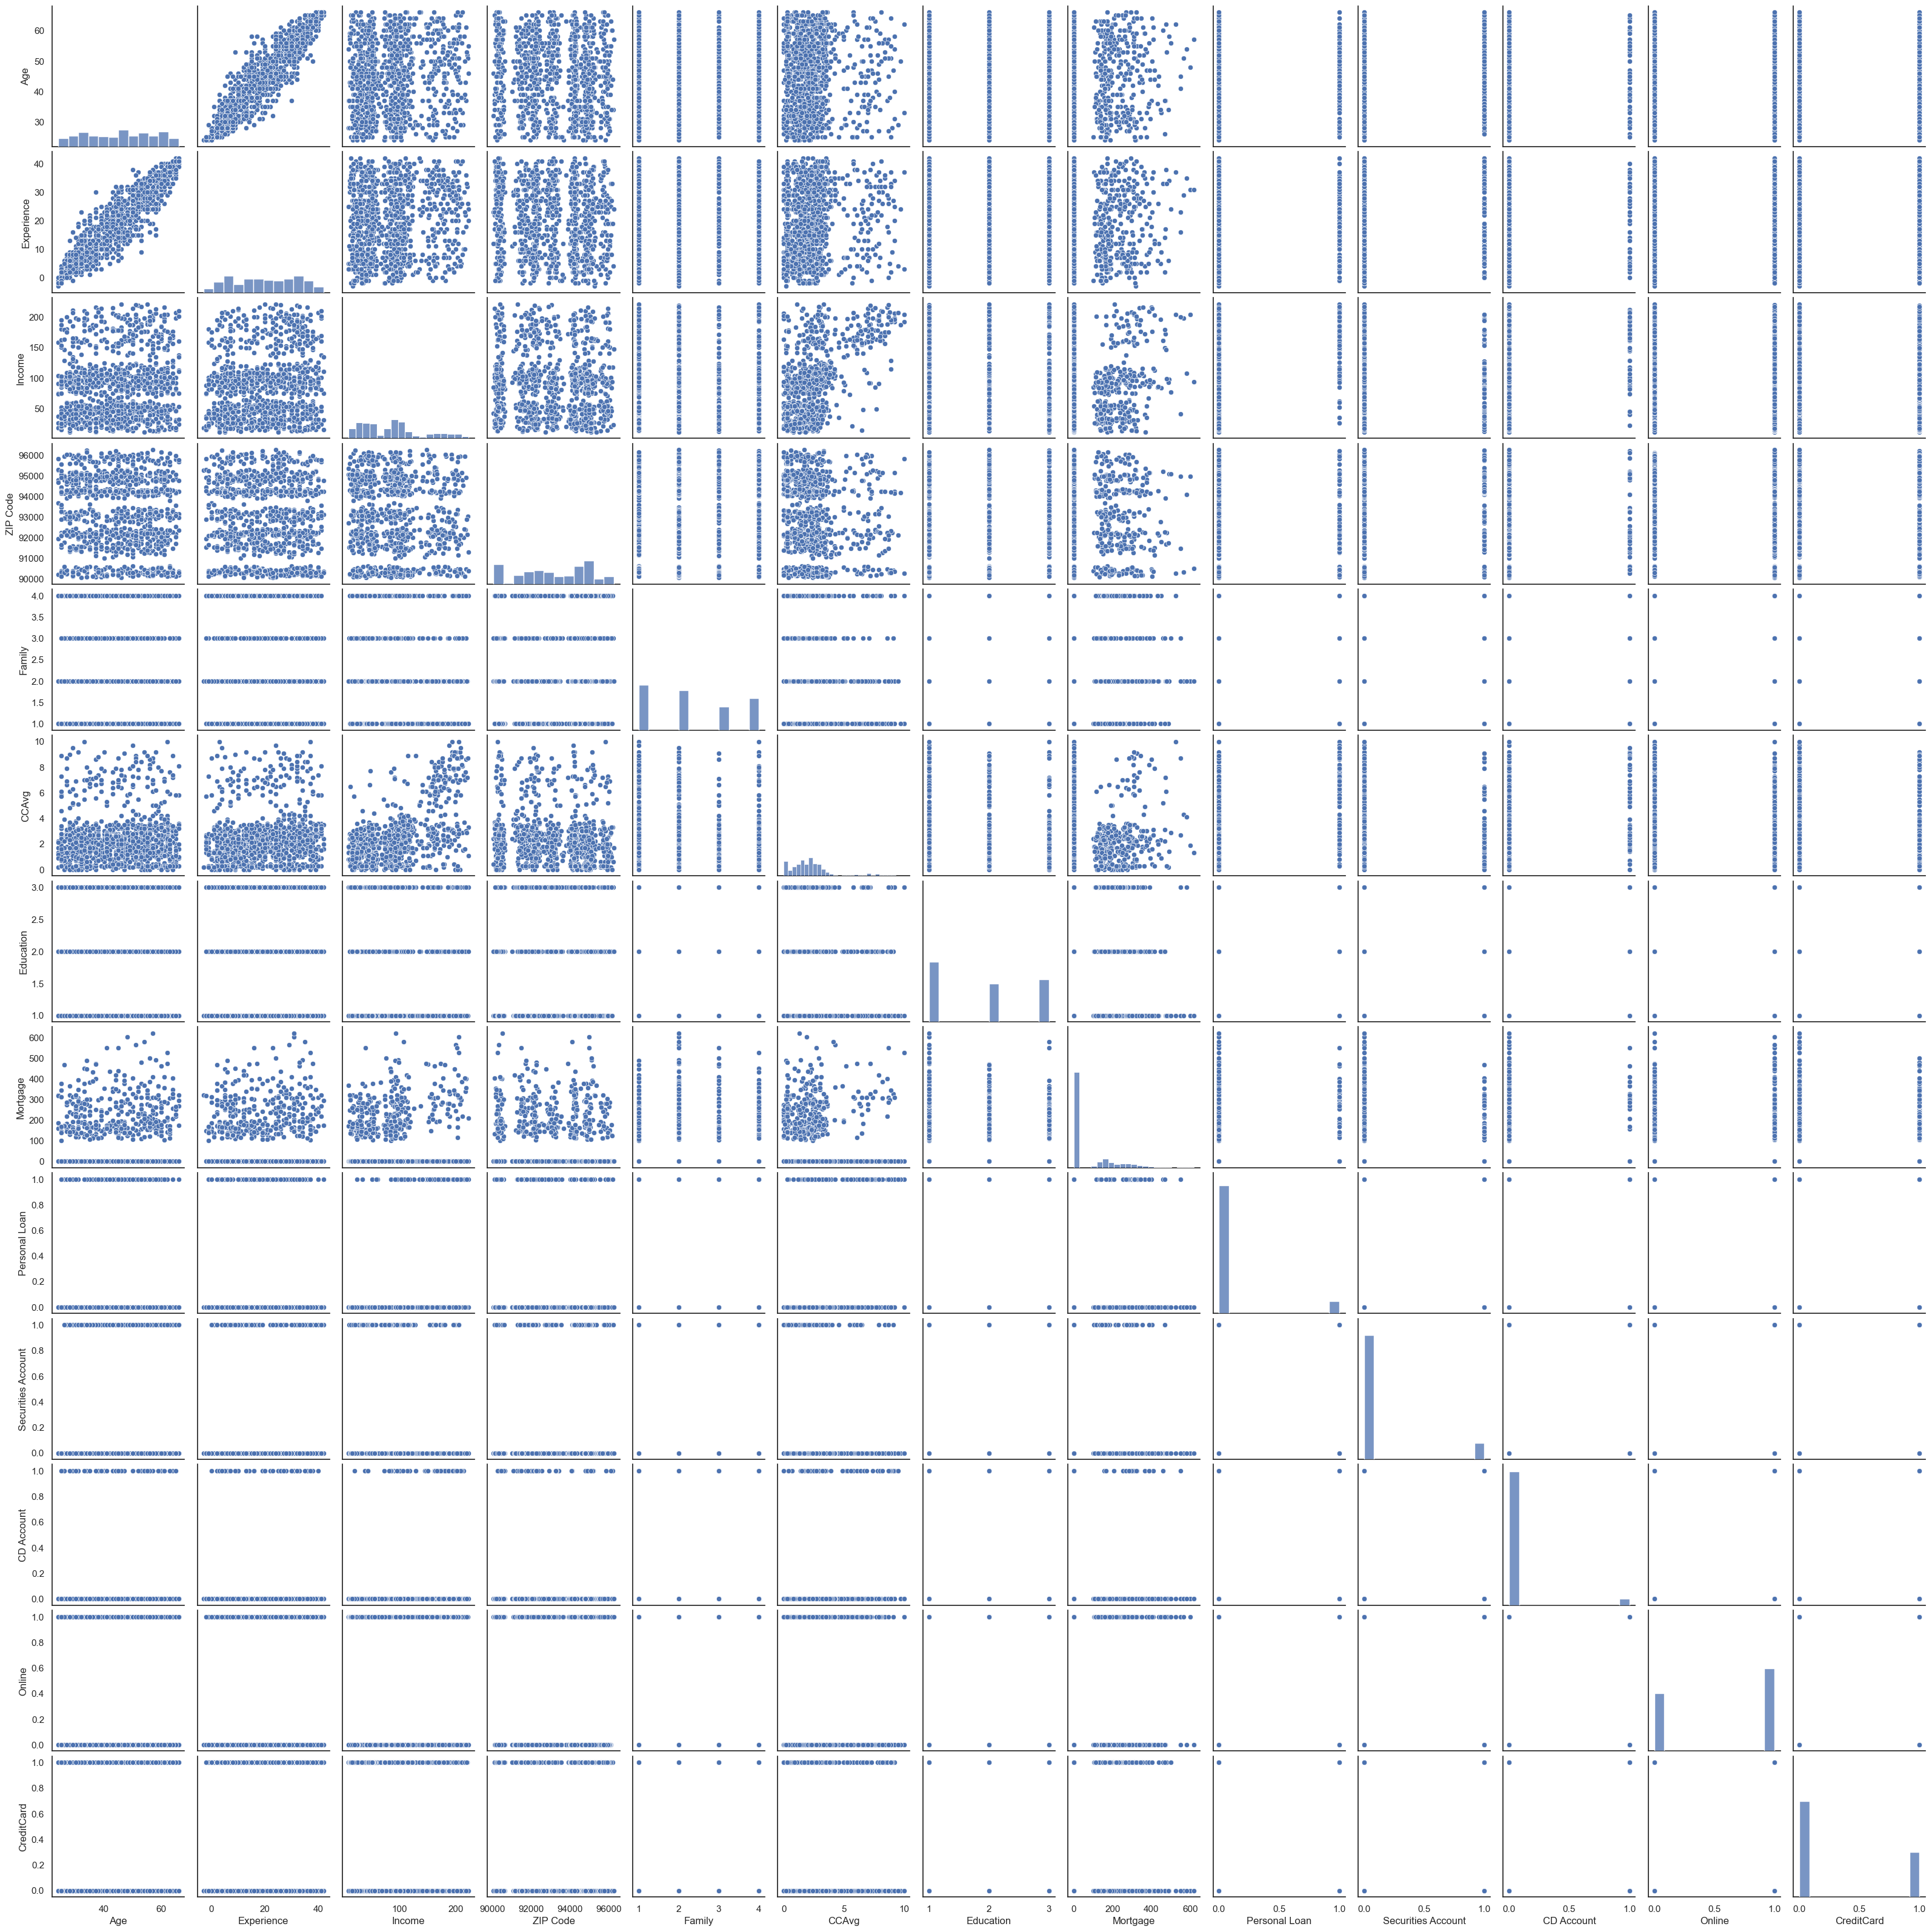

In [30]:
sns.pairplot(data=df_loan_fake)

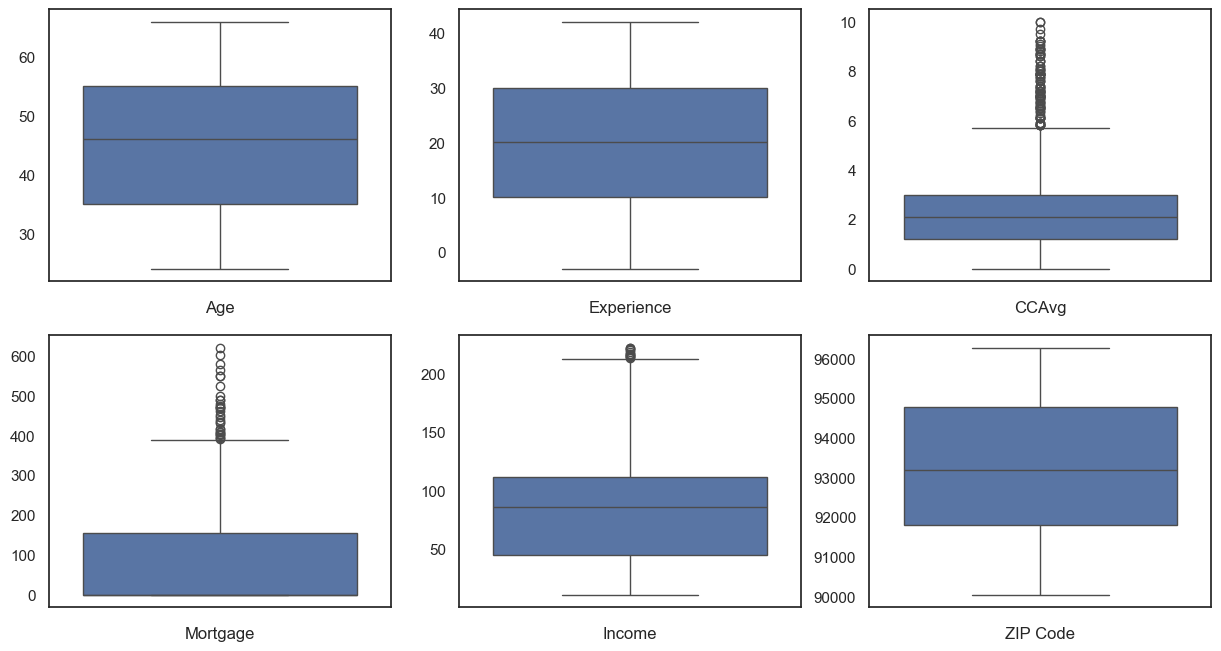

In [31]:
fig, ax = plt.subplots(rows_number, col_num, figsize=(col_num*5, rows_number*4))
for i in range(len(non_cat_col), rows_number*col_num):
    fig.delaxes(ax[rows_number-1, i%col_num])
for i in range(len(non_cat_col)):
    sns.boxplot(df_loan_fake[non_cat_col[i]], ax=ax[int(i/col_num),i%col_num])
    ax[int(i/col_num),i%col_num].set_xlabel(non_cat_col[i])
    ax[int(i/col_num),i%col_num].set_ylabel("")
plt.show()

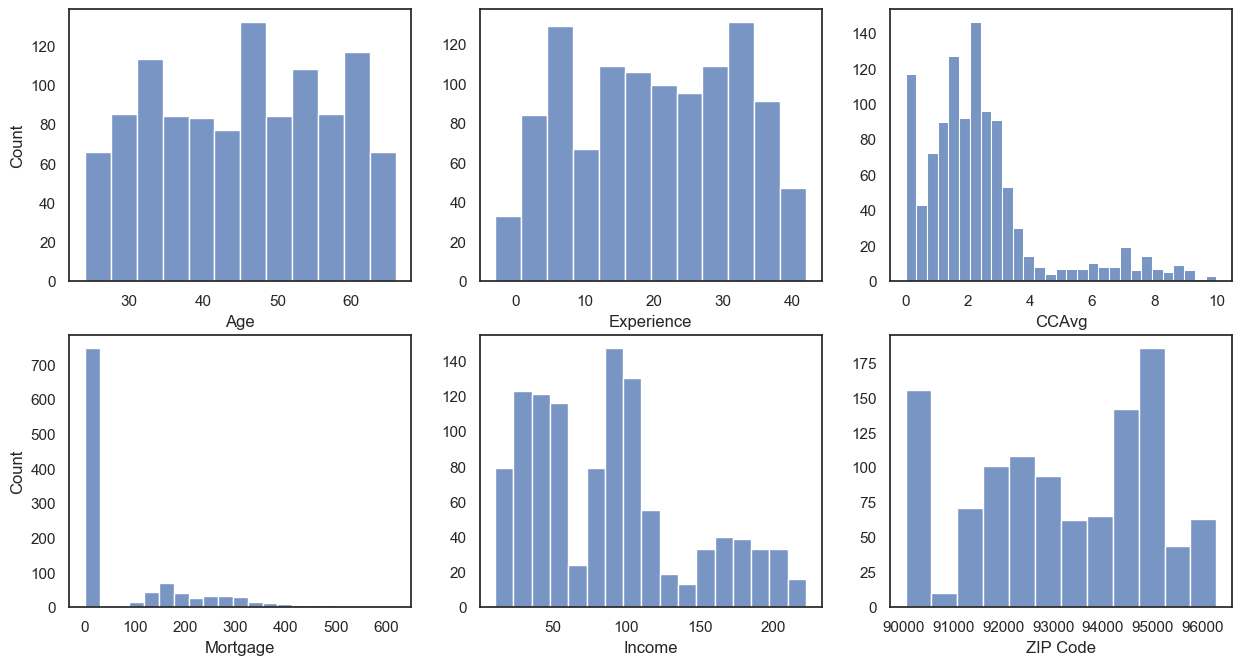

In [32]:
fig, ax = plt.subplots(rows_number, col_num, figsize=(col_num*5, rows_number*4))
for i in range(len(non_cat_col), rows_number*col_num):
    fig.delaxes(ax[rows_number-1, i%col_num])
for i in range(len(non_cat_col)):
    sns.histplot(df_loan_fake[non_cat_col[i]], ax=ax[int(i/col_num),i%col_num])
    if i % col_num != 0:  # If not the first column in the row, remove y-axis labels
        ax[int(i/col_num),i%col_num].set_ylabel("")
plt.show()

In [33]:
mode_value = df_loan_fake["Mortgage"].mode().iloc[0]

<Axes: xlabel='Mortgage', ylabel='Count'>

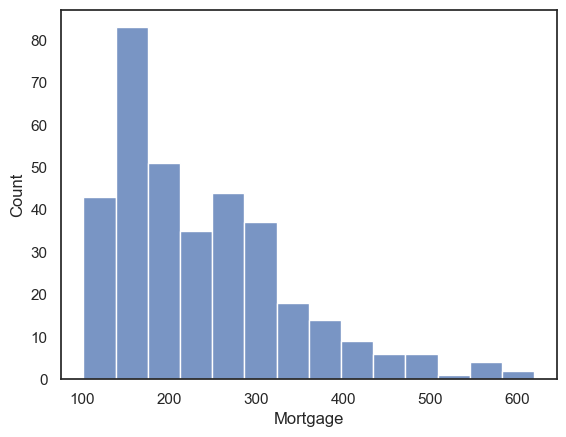

In [34]:
sns.histplot(df_loan_fake["Mortgage"].where(df_loan_fake["Mortgage"]!=mode_value))

<Axes: >

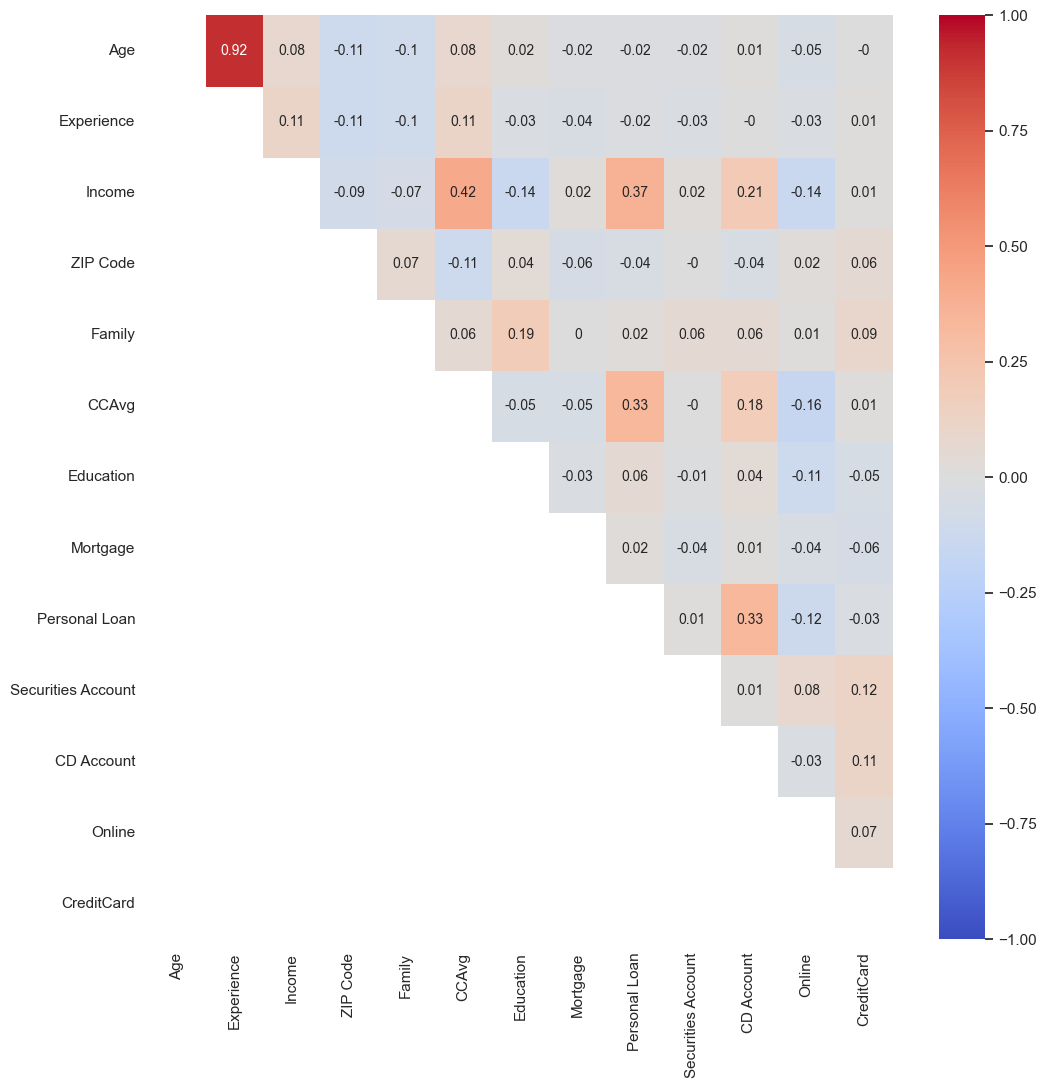

In [35]:
plt.figure(figsize = (12,12))
sns.heatmap(round(df_loan_fake.corr(method = 'spearman'),2), mask = np.tril(df_loan_fake.corr(method = 'spearman')), vmax=1, vmin=-1, 
            center=0,cmap='coolwarm', annot=True, annot_kws={"size": 10})

<Axes: xlabel='Age', ylabel='Percent'>

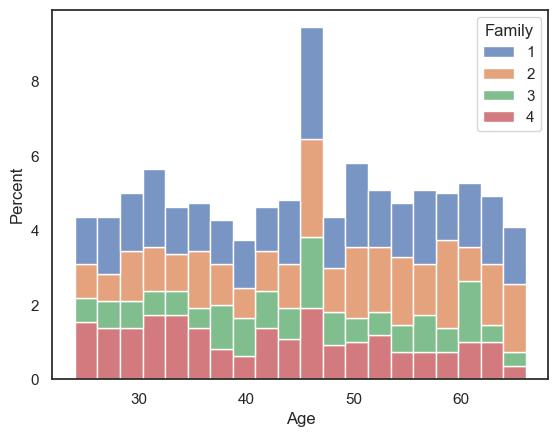

In [36]:
sns.histplot(data=df_loan_fake, x="Age", hue="Family", multiple="stack", stat="percent", palette="deep", bins=20)

### Constraints & Conditions

In [37]:
# class balance
for el in cat_col:
    print(df_loan_fake[[el]].value_counts()/len(df_loan_fake))

Family
1         0.323636
2         0.282727
4         0.225455
3         0.168182
Name: count, dtype: float64
Education
1            0.428182
3            0.300000
2            0.271818
Name: count, dtype: float64
Personal Loan
0                0.910909
1                0.089091
Name: count, dtype: float64
Securities Account
0                     0.883636
1                     0.116364
Name: count, dtype: float64
CD Account
0             0.953636
1             0.046364
Name: count, dtype: float64
Online
1         0.586364
0         0.413636
Name: count, dtype: float64
CreditCard
0             0.68
1             0.32
Name: count, dtype: float64


<Axes: xlabel='Family', ylabel='count'>

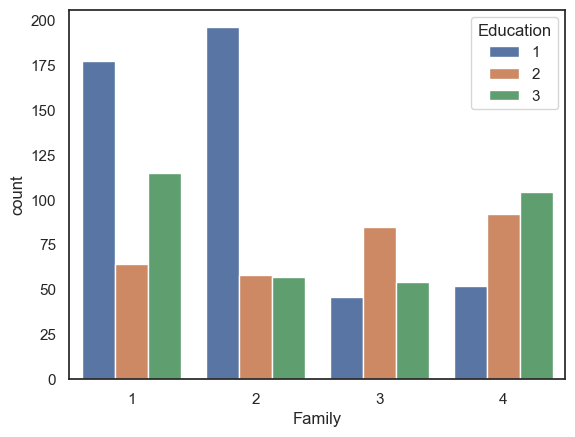

In [38]:
# condition
sns.countplot(data=df_loan_fake, x="Family", hue="Education", palette="deep")

In [39]:
indicator = (df_loan_fake["Family"] == 1) & (df_loan_fake["Education"] == 3)
count = indicator.sum()
count/len(df_loan_fake)

0.10454545454545454

## Merged

In [40]:
df_loan_m = df_loan.copy()
df_loan_fake_m = df_loan_fake.copy()

In [41]:
df_loan_m = df_loan_m.sample(len(df_loan_fake_m))

In [42]:
df_loan_m["data"] = "real"
df_loan_fake_m["data"] = "fake"

In [43]:
df_merged = pd.concat([df_loan_m,  df_loan_fake_m],ignore_index=True)

In [44]:
df_merged.duplicated().sum()

0

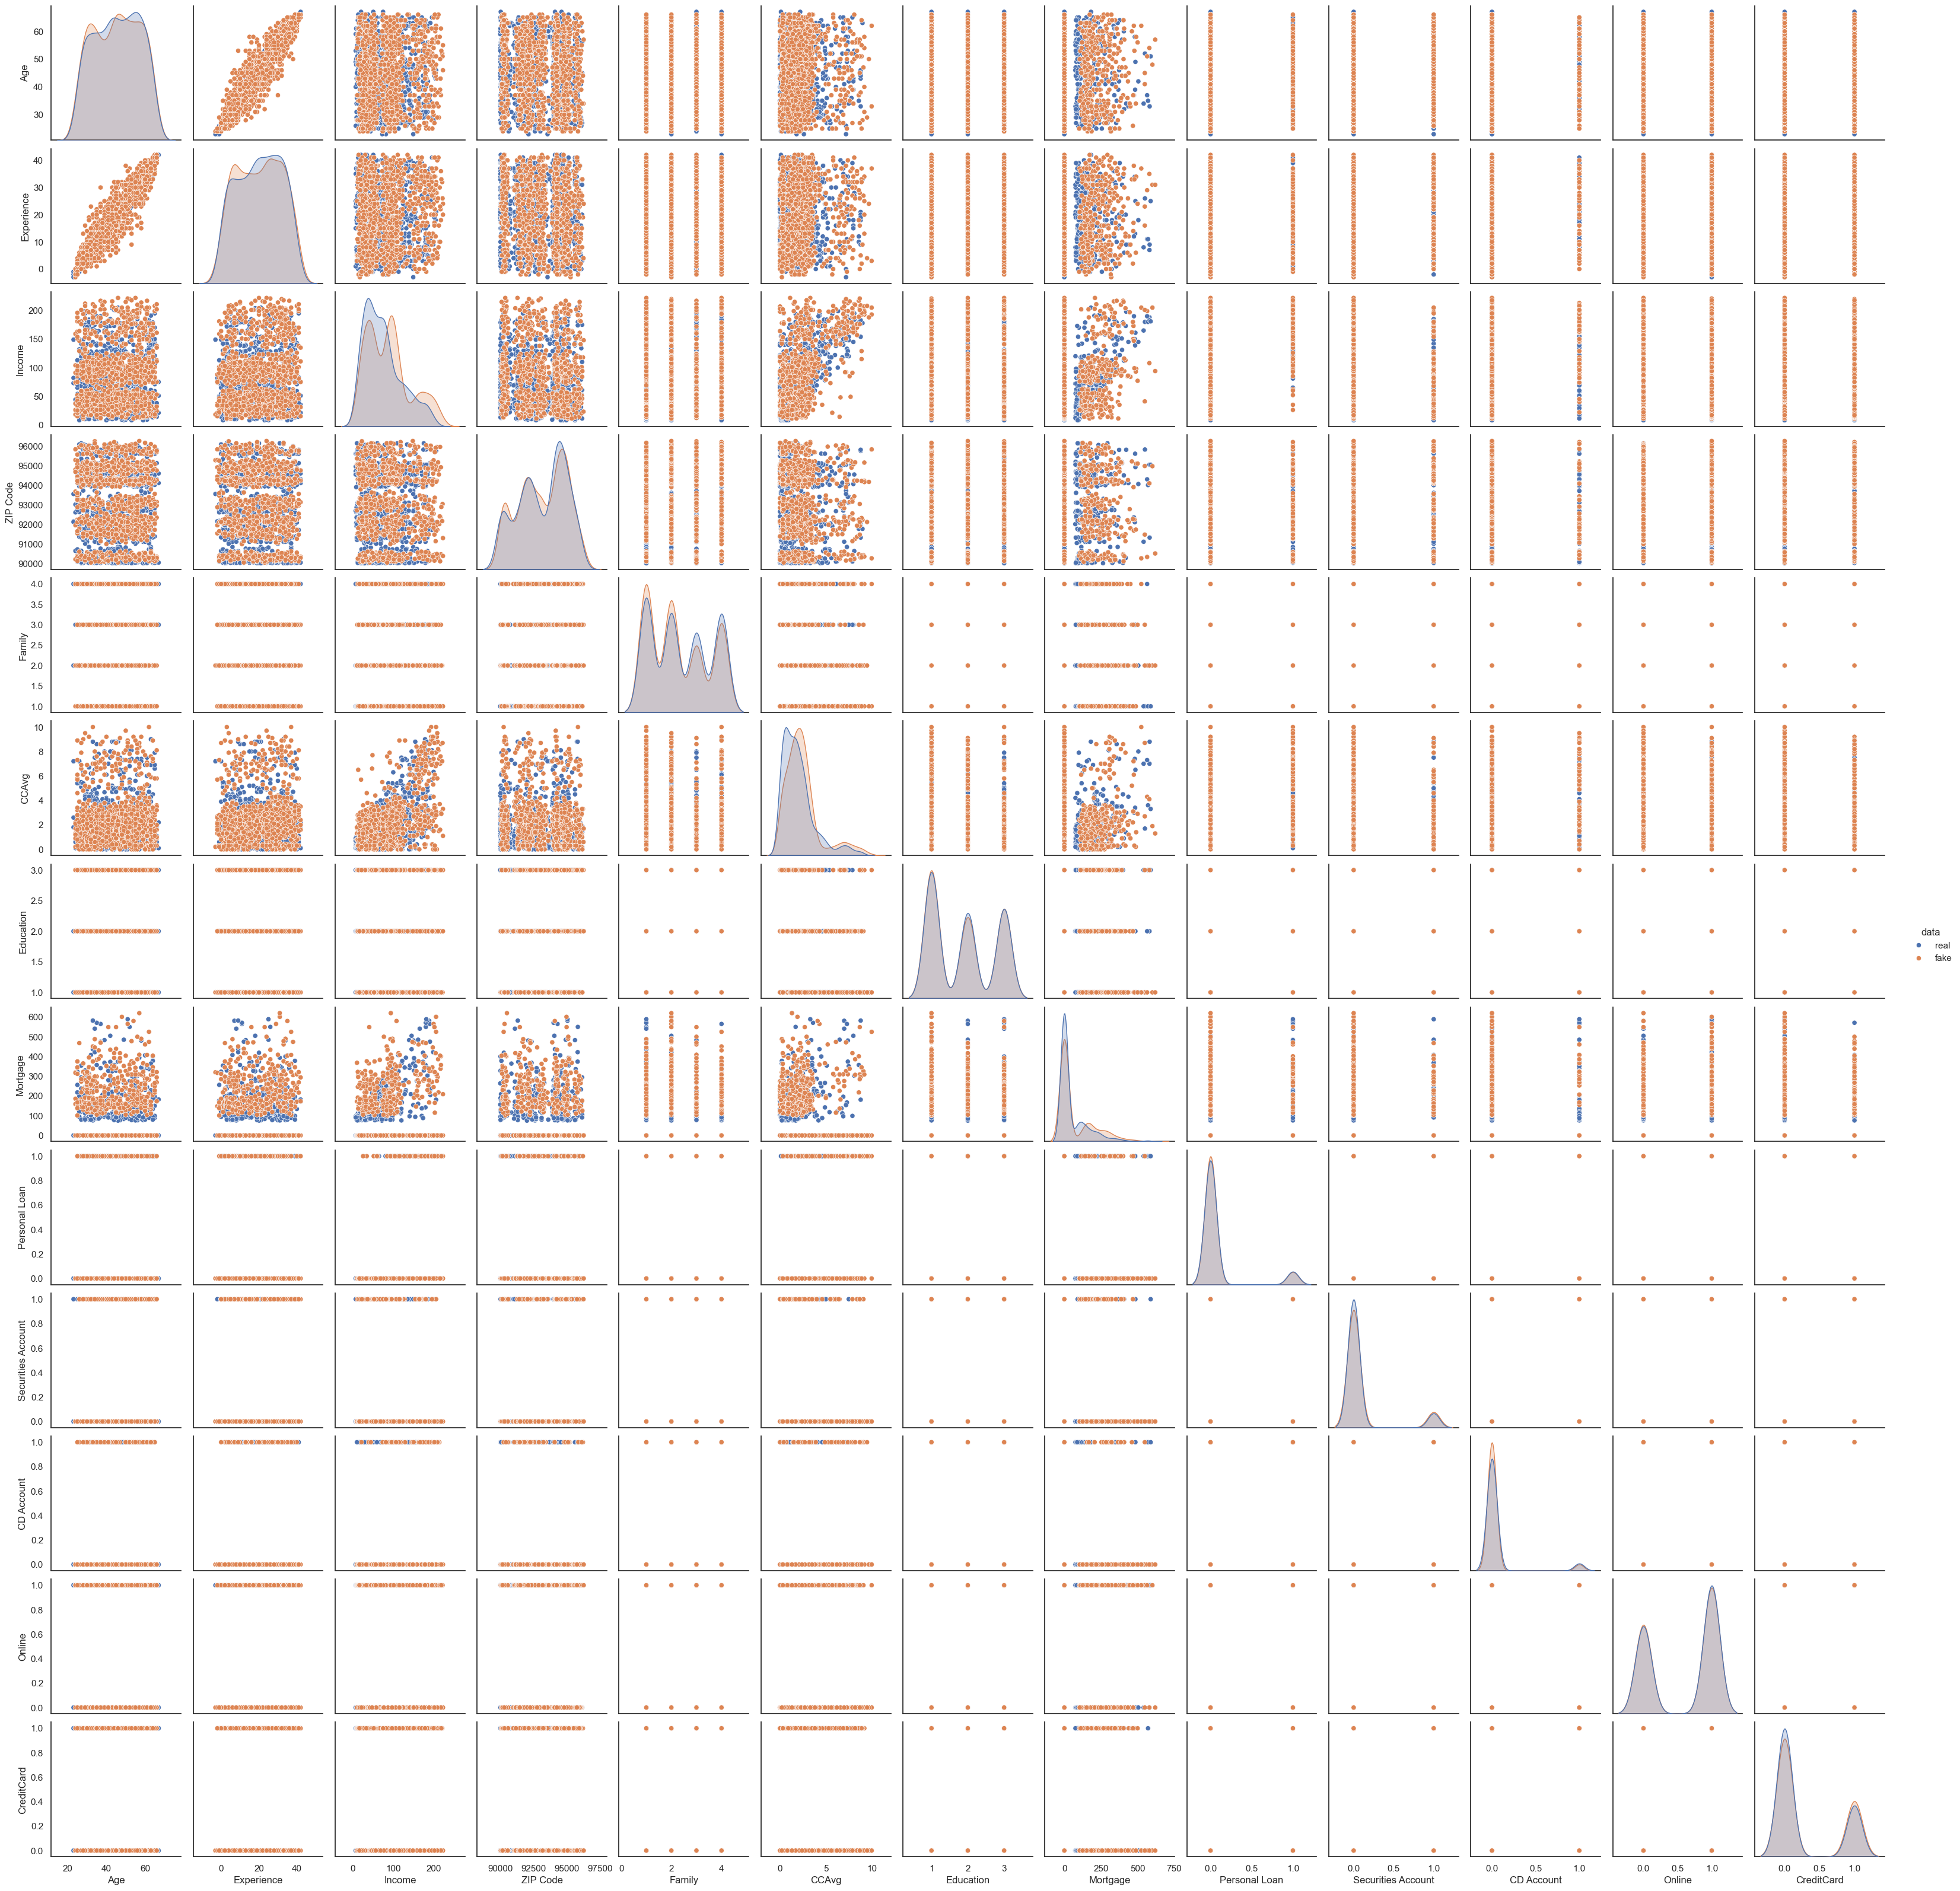

In [45]:
sns.pairplot(df_merged, hue="data")

In [46]:
!jupyter nbconvert --to html --no-input loan.ipynb

[NbConvertApp] Converting notebook loan.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 17 image(s).
[NbConvertApp] Writing 7243278 bytes to loan.html
